# 3x2 Time evolution plots Kpc scale

In [5]:
# Basics
import numpy as np
import pandas as pd
import os

# Scipy
from scipy import optimize
from scipy.ndimage import gaussian_filter
#from sklearn.neighbors import KDTree
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator, MaxNLocator
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib.ticker as ticker
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

# RC params
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams["axes.edgecolor"] = 'black'
rcParams["legend.edgecolor"] = '0.8'
plt.rcParams.update({'errorbar.capsize': 2})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

def fmt(x, pos):
    ''' Used for the x10^ for colourbars'''
    if x == 0:
        return r'0'
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [6]:
model_path = "/Users/maddie/Desktop/Thesis/Simulation_output/K_Magellan/runw46"
os.chdir(model_path)

In [129]:
arr = 'gal'
if arr =='new':
    arr0 = [[0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0]]
    arr0 = np.asarray(arr0)
else:
    arr0 = np.load(arr+'0.npy')
    
arr1 = np.load(arr+'1.npy')
arr2 = np.load(arr+'2.npy')
arr3 = np.load(arr+'3.npy')
arr4 = np.load(arr+'4.npy')
arr5 = np.load(arr+'5.npy')
arr6 = np.load(arr+'6.npy')

col_header = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'iwas', 'id', 'mass']
arr0 = pd.DataFrame(arr0, columns=col_header)
arr1 = pd.DataFrame(arr1, columns=col_header)
arr2 = pd.DataFrame(arr2, columns=col_header)
arr3 = pd.DataFrame(arr3, columns=col_header)
arr4 = pd.DataFrame(arr4, columns=col_header)
arr5 = pd.DataFrame(arr5, columns=col_header)
arr6 = pd.DataFrame(arr6, columns=col_header)

In [130]:
rng = 1500
bns = 300
area = (2*rng/bns)**2
# Calculate histogram bins then use imshow()
# Weighted by mass
#gal_count, xedges, yedges = np.histogram2d(new['y_scale'], new['z_scale'], bins=[bins, bins],range=([-rang,rang],[-rang,rang]), weights=new['mass'])
arr0_hist, xedges, yedges = np.histogram2d(arr0.x, arr0.y, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=arr0.mass)
arr1_hist, xedges, yedges = np.histogram2d(arr1.x, arr1.y, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=arr1.mass)
arr2_hist, xedges, yedges = np.histogram2d(arr2.x, arr2.y, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=arr2.mass)
arr3_hist, xedges, yedges = np.histogram2d(arr3.x, arr3.y, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=arr3.mass)
arr4_hist, xedges, yedges = np.histogram2d(arr4.x, arr4.y, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=arr4.mass)
arr5_hist, xedges, yedges = np.histogram2d(arr5.x, arr5.y, bins=bns ,range=([-rng,rng],[-rng,rng]), weights=arr5.mass)



smoothing_sigma = 1


'''arr0_hist = gaussian_filter(arr0_hist, sigma=smoothing_sigma)
arr1_hist = gaussian_filter(arr1_hist, sigma=smoothing_sigma)
arr2_hist = gaussian_filter(arr2_hist, sigma=smoothing_sigma)
arr3_hist = gaussian_filter(arr3_hist, sigma=smoothing_sigma)
arr4_hist = gaussian_filter(arr4_hist, sigma=smoothing_sigma)
arr5_hist = gaussian_filter(arr5_hist, sigma=smoothing_sigma)'''



if arr =='old':
    print(unravel_index(arr0_hist.argmax(), arr0_hist.shape))
    print(unravel_index(arr1_hist.argmax(), arr1_hist.shape))
    print(unravel_index(arr2_hist.argmax(), arr2_hist.shape))
    print(unravel_index(arr3_hist.argmax(), arr3_hist.shape))
    print(unravel_index(arr4_hist.argmax(), arr4_hist.shape))
    print(unravel_index(arr5_hist.argmax(), arr5_hist.shape))
    
    

In [134]:
arr0_max = np.max(arr0_hist/area)
arr1_max = np.max(arr1_hist/area)
arr2_max = np.max(arr2_hist/area)
arr3_max = np.max(arr3_hist/area)
arr4_max = np.max(arr4_hist/area)
arr5_max = np.max(arr5_hist/area)

all_max = np.max([arr0_max, arr1_max, arr2_max, arr3_max, arr4_max, arr5_max])

shading = 'quadric'
gamma = 0.4

In [135]:
print(arr0_max, arr1_max, arr2_max, arr3_max, arr4_max, arr5_max)

151.2 167.4 176.4 185.4 226.8 219.6


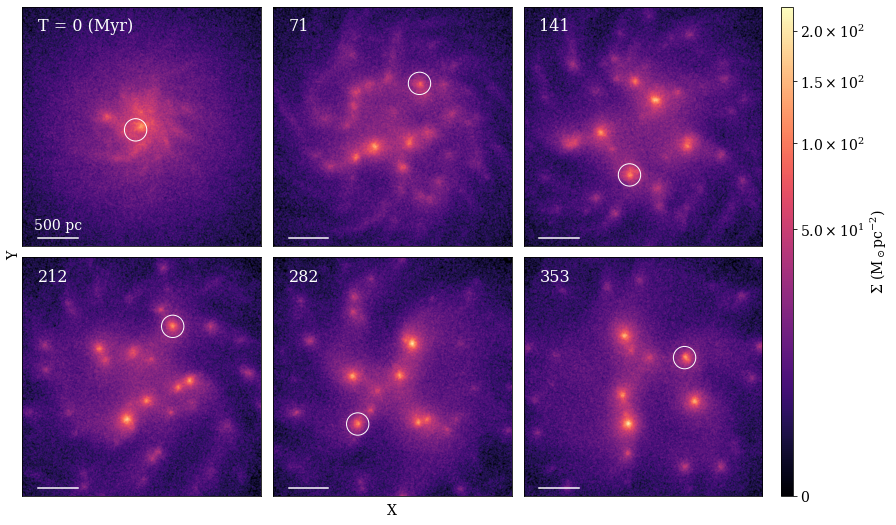

In [136]:

time_x = -1300
time_y = 1200

#cmap = plt.cm.get_cmap('magma_r')
cmap = plt.cm.get_cmap('magma')


fig = plt.figure()
gs = gridspec.GridSpec(2, 5, width_ratios=[1,1,1, 0.05, 0.05])  
cbax = plt.subplot(gs[:,4])
fig.set_size_inches(12,8)

ax0 = plt.subplot(gs[0,0]) # top left
ax1 = plt.subplot(gs[0,1]) # top middle
ax2 = plt.subplot(gs[0,2]) # top right
ax3 = plt.subplot(gs[1,0]) # bottom left
ax4 = plt.subplot(gs[1,1]) # bottom middle
ax5 = plt.subplot(gs[1,2]) # bottom right
#fig.set_size_inches(6, 6.05)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)


plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)




props = dict(facecolor='white',alpha=0.9)  
vmin = 0
#vmin = 1e3



im = ax0.imshow(arr0_hist.T/area, cmap=cmap, origin='lower',interpolation = shading, vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), 
                extent=[-rng, rng, -rng, rng])
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.scatter((1429-1500), (1453-1500), s=500, facecolors='none', edgecolors='white', zorder=5)
ax0.text(time_x, time_y, 'T = 0 (Myr)',  color = 'white', fontsize=16)


ax1.imshow(arr1_hist.T/area, cmap=cmap, origin='lower', interpolation = shading,vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), 
           extent=[-rng, rng, -rng, rng])
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.scatter((1844-1500), (2037-1500), s=500, facecolors='none', edgecolors='white', zorder=5)
ax1.text(time_x, time_y, '71',  color = 'white', fontsize=16)

ax2.imshow(arr2_hist.T/area, cmap=cmap, origin='lower',interpolation = shading, vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), 
           extent=[-rng, rng, -rng, rng])
ax2.scatter((1331-1500), (887-1500), s=500, facecolors='none', edgecolors='white', zorder=5)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.text(time_x, time_y, '141',  color = 'white', fontsize=16)


ax3.imshow(arr3_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), 
           extent=[-rng, rng, -rng, rng])
ax3.scatter((1895-1500), (2135-1500), s=500, facecolors='none', edgecolors='white', zorder=5)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.text(time_x, time_y, '212',  color = 'white', fontsize=16)

ax4.imshow(arr4_hist.T/area, cmap=cmap, origin='lower',interpolation = shading,vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), 
           extent=[-rng, rng, -rng, rng])
ax4.scatter((1068-1500), (908-1500), s=500, facecolors='none', edgecolors='white', zorder=5)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.text(time_x, time_y, '282', color = 'white', fontsize=16)

ax5.imshow(arr5_hist.T/area, cmap=cmap, origin='lower', interpolation = shading, vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), 
           extent=[-rng, rng, -rng, rng])
ax5.scatter((2023-1500), (1742-1500), s=500, facecolors='none', edgecolors='white', zorder=5)
ax5.xaxis.set_minor_locator(AutoMinorLocator())
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.text(time_x, time_y, '353', color = 'white', fontsize=16)

ax0.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax1.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax2.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax3.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax4.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
ax5.tick_params(direction='in', axis='both', which='both', bottom=False,top=False, left=False, right=False)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.0, hspace=0.05)    



ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax5.set_yticklabels([])
ax5.set_xticklabels([])


ax0.text(-1350, -1300, '500 pc', c = 'white')
ax0.plot([-1300,-800], [-1400, -1400], color='white')
ax1.plot([-1300,-800], [-1400, -1400], color='white')
ax2.plot([-1300,-800], [-1400, -1400], color='white')
ax3.plot([-1300,-800], [-1400, -1400], color='white')
ax4.plot([-1300,-800], [-1400, -1400], color='white')
ax5.plot([-1300,-800], [-1400, -1400], color='white')



ax4.set_xlabel("X")
#ax3.set_ylabel("y (pc)")
fig.text(0.04, 0.5, 'Y', va='center', rotation='vertical')

cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt))
#cb = Colorbar(ax = cbax, mappable = im)
cb.set_label(r'$\Sigma \ (\rm{M}_\odot$pc$^{-2})$')
plt.savefig("time_ev_"+arr+'_2', bbox_inches='tight', dpi = 300)
#plt.close()
plt.show()